In [1]:
#Principal component Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)

In [4]:
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:,0].values

In [6]:
#iloc/loc are to retrive rows

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

print(X_train)

[[1.362e+01 4.950e+00 2.350e+00 ... 9.100e-01 2.050e+00 5.500e+02]
 [1.376e+01 1.530e+00 2.700e+00 ... 1.250e+00 3.000e+00 1.235e+03]
 [1.373e+01 1.500e+00 2.700e+00 ... 1.190e+00 2.710e+00 1.285e+03]
 ...
 [1.388e+01 5.040e+00 2.230e+00 ... 5.800e-01 1.330e+00 4.150e+02]
 [1.196e+01 1.090e+00 2.300e+00 ... 9.900e-01 3.130e+00 8.860e+02]
 [1.270e+01 3.870e+00 2.400e+00 ... 1.190e+00 3.130e+00 4.630e+02]]


In [8]:
print(y_train)

[3 1 1 1 3 2 2 3 2 2 2 1 2 3 1 3 2 1 3 3 2 1 2 2 2 2 3 1 2 2 1 1 3 1 2 1 1
 2 3 3 1 3 3 3 1 2 3 3 2 3 2 2 2 1 2 2 3 3 2 1 1 2 3 3 2 1 2 2 2 1 1 1 1 1
 3 1 2 3 2 2 3 1 2 1 2 2 3 2 1 1 1 3 2 1 1 2 2 3 3 2 1 1 2 2 3 1 3 1 2 2 2
 2 1 3 1 1 1 1 2 2 3 3 2 2]


In [9]:
sc = StandardScaler()

In [10]:
X_train_std = sc.fit_transform(X_train)

In [39]:
X_test_std = sc.transform(X_test)
print(X_test_std)

[[ 8.94437367e-01 -3.88117877e-01  1.10073064e+00 -8.12017114e-01
   1.13201117e+00  1.09807851e+00  7.12041017e-01  1.81013423e-01
   6.62804643e-02  5.12859235e-01  7.96297849e-01  4.48295020e-01
   1.90593792e+00]
 [-1.04879931e+00 -7.72993966e-01  5.41190056e-01 -2.40938809e-01
   3.49414498e-01 -7.07219221e-01 -3.08121293e-01  6.76138376e-01
  -1.03520519e+00 -9.06567274e-01  2.24570604e+00 -5.61881713e-01
  -1.22874035e+00]
 [ 1.64744158e+00 -4.13776283e-01  2.42768413e-01 -1.56343594e+00
  -2.19746720e-01  2.84881333e-01  4.47191186e-01 -5.61674005e-01
   5.74658458e-01  6.79643589e-02  2.98063782e-01  1.38631627e+00
   1.64471473e+00]
 [ 2.02159300e-01 -4.90751501e-01 -9.13615453e-01 -2.58536553e+00
   6.48338887e-02  5.28840485e-01  6.82613258e-01 -8.91757306e-01
  -6.11556861e-01 -3.00662824e-01  4.33945800e-01  1.12655654e+00
   9.07143373e-01]
 [-8.05894728e-01 -1.09800044e+00 -1.06282627e+00 -3.91222574e-01
  -7.88907938e-01  1.94380357e+00  1.65372930e+00 -1.05679896e+00


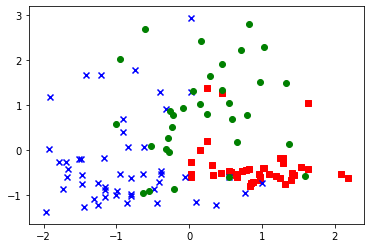

In [38]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_std[y_train == l, 0], X_train_std[y_train == l, 1], c = c, label = l, marker = m)

In [13]:
cov_mat = np.cov(X_train_std.T)

In [14]:
#cov :- measure of the relationship between two random variables. The metric evaluates how much – to what extent – the variables change together
    #Positive covariance: Indicates that two variables tend to move in the same direction.
    #Negative covariance: Reveals that two variables tend to move in inverse directions.

In [15]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [16]:
#we performed the eigen decomposition, which yielded a vector (eigen_vals) consisting of 13 eigenvalues and the corresponding eigenvectors stored as columns in a 13 x 13-dimensional matrix (eigen_vecs).

In [17]:
tot = sum(eigen_vals)

In [18]:
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
print(var_exp)

[0.3695146859960766, 0.18434927059884168, 0.11815159094596975, 0.07334251763785461, 0.06422107821731675, 0.05051724484907655, 0.039546538912414414, 0.026439183169219973, 0.023893192591852925, 0.016296137737251006, 0.013800211221948426, 0.011722262443085971, 0.008206085679091394]


In [19]:
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

[0.36951469 0.55386396 0.67201555 0.74535807 0.80957914 0.86009639
 0.89964293 0.92608211 0.9499753  0.96627144 0.98007165 0.99179391
 1.        ]


In [20]:
#we calculated the cummulative sum of explained variances
#The total variance is the sum of variances of all individual principal components.
#The fraction of variance explained by a principal component is the ratio between the variance of that principal component and the total variance.

<BarContainer object of 13 artists>

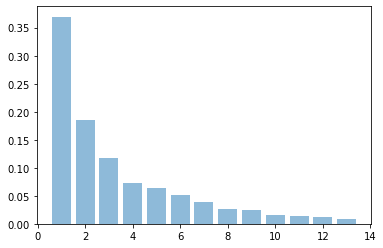

In [21]:
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='individual Explained variance')

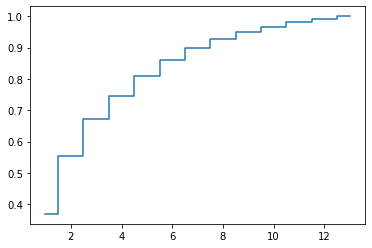

In [22]:
plt.step(range(1, 14), cum_var_exp, where='mid', label='cumm. Explained Variance')

Text(0.5, 0, 'PC index')

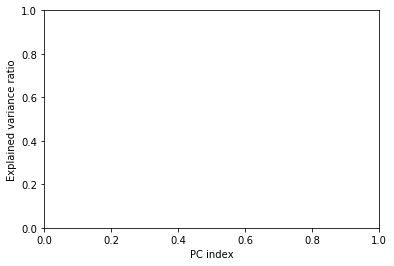

In [23]:
plt.ylabel('Explained variance ratio')
plt.xlabel('PC index')

In [24]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
print(eigen_pairs)

[(4.842745315655898, array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
       -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
       -0.32613263, -0.36861022, -0.29669651])), (2.4160245870352255, array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
        0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
       -0.20716433, -0.24902536,  0.38022942])), (1.5484582488203513, array([-0.13774873,  0.09615039,  0.67777567,  0.62504055,  0.19613548,
        0.14031057,  0.11705386,  0.13121778,  0.0304309 , -0.07992997,
        0.05305915,  0.13239103, -0.07065022])), (0.9612043774977367, array([-0.0032961 ,  0.56264669, -0.10897711,  0.0338187 , -0.36751107,
        0.24024513,  0.1870533 , -0.02292622,  0.49626233,  0.10648294,
       -0.36905375,  0.14201609, -0.16768217])), (0.8416616104578422, array([-0.29062523,  0.08953787, -0.16083499,  0.05158734,  0.67648707,
       -0.11851114, -0.10710035, -0.50758161,  0.20

In [25]:
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
print(eigen_pairs)

[(4.842745315655898, array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
       -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
       -0.32613263, -0.36861022, -0.29669651])), (2.4160245870352255, array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
        0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
       -0.20716433, -0.24902536,  0.38022942])), (1.5484582488203513, array([-0.13774873,  0.09615039,  0.67777567,  0.62504055,  0.19613548,
        0.14031057,  0.11705386,  0.13121778,  0.0304309 , -0.07992997,
        0.05305915,  0.13239103, -0.07065022])), (0.9612043774977367, array([-0.0032961 ,  0.56264669, -0.10897711,  0.0338187 , -0.36751107,
        0.24024513,  0.1870533 , -0.02292622,  0.49626233,  0.10648294,
       -0.36905375,  0.14201609, -0.16768217])), (0.8416616104578422, array([-0.29062523,  0.08953787, -0.16083499,  0.05158734,  0.67648707,
       -0.11851114, -0.10710035, -0.50758161,  0.20

In [26]:
#sort form high to low

In [27]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

In [28]:
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [29]:
#we collect the two eigenvectors that correspond to the two largest eigenvalues, to capture about 60% of the variance in this dataset.
#ideally we choose number of PC according to tradeoff (which is an experimental process)

In [30]:
#we have created a 13 x 2-dimensional projection matrix W from the top two eigenvectors.
#Using the projection matrix, we can now transform a sample x (represented as a 1 x 13-dimensional row vector) onto the PCA subspace

In [31]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [32]:
X_train_pca = X_train_std.dot(w)
print(X_train_pca)

[[ 2.38299011  0.45458499]
 [-1.96578183  1.65376939]
 [-2.53907598  1.02909066]
 [-1.43010776  0.6024011 ]
 [ 3.14147227  0.66214979]
 [ 0.50253552 -2.08907131]
 [ 0.04867722 -2.27536044]
 [ 2.47888989 -0.08603318]
 [ 2.01900259 -1.3538719 ]
 [ 0.75156583 -2.55367947]
 [ 0.72268915 -1.18404391]
 [-3.00366211  0.94626934]
 [ 2.57518878 -1.0697549 ]
 [ 3.73151104  1.01968876]
 [-1.12276518  0.13877   ]
 [ 2.85996853  2.28819559]
 [-0.74717125 -3.21746061]
 [-1.58427878  0.16048055]
 [ 3.38887101  2.11550689]
 [ 3.15405473  0.54233966]
 [-1.28036506 -1.72926871]
 [-1.71438911  0.71745249]
 [-1.55040291 -1.7580591 ]
 [ 1.10984489 -1.20480693]
 [-0.69108418 -1.71385374]
 [-2.086036   -1.68453671]
 [ 2.90393456  1.95258805]
 [-2.07635784  1.47183304]
 [-1.74756185 -1.25842546]
 [ 2.59424456 -0.1056037 ]
 [-2.50372355  0.70412212]
 [-2.19448402  2.18657552]
 [ 3.91634534  0.16136475]
 [-1.11739618  0.51921086]
 [-0.89996804 -2.04759575]
 [-1.71469178  0.61392169]
 [-2.48581303  0.76839561]
 

In [33]:
#let’s visualize the transformed Wine training set

In [34]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

Text(0, 0.5, 'PC 2')

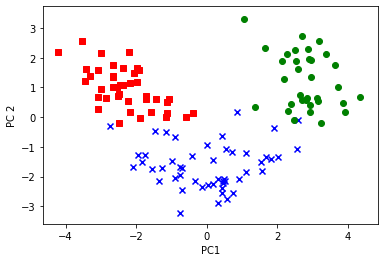

In [35]:
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], X_train_pca[y_train == l, 1], c = c, label = l, marker = m)
    
plt.xlabel('PC1')
plt.ylabel('PC 2')

In [36]:
#we can see in the resulting plot, the data is more spread along the x-axis — the first principal component — than the second principal component (y-axis)